In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fun import *
from metody import *
from ODE_solver import *
import metody2

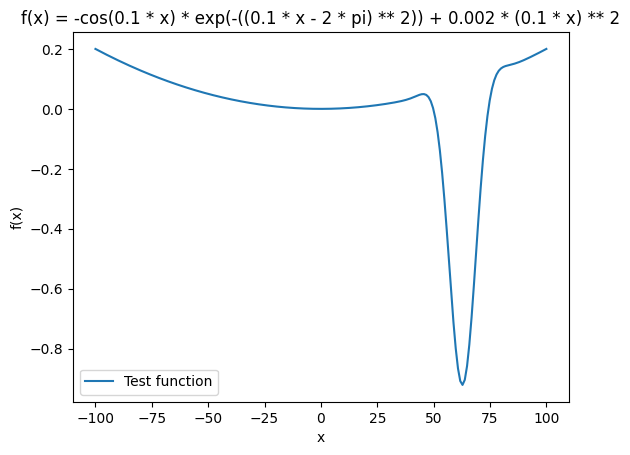

In [2]:
test_fun_obj = funclass()
x = np.linspace(-100, 100, 200)
y = test_fun_obj.f1(x)
plt.plot(x, y, label='Test function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = -cos(0.1 * x) * exp(-((0.1 * x - 2 * pi) ** 2)) + 0.002 * (0.1 * x) ** 2')
plt.legend()

In [3]:
rand_set = []
for i in range(100):
    rand_set.append(random.uniform(-100.0, 100.0))
expan_result_set = []
for i in range(100):
    expan_result_set.append(ekspansja(rand_set[i], 0.001, 1.1, 1000, test_fun_obj))
expan_np = np.array(expan_result_set)

In [4]:
fibon_result_set = []
for i in range(100):
    fibon_result_set.append(fibonacci(expan_result_set[i][0], expan_result_set[i][1], 0.001, test_fun_obj))
fibon_y_result_set = []
for x in fibon_result_set:
     if isinstance(x[0], float):
         fibon_y_result_set.append(test_fun_obj.f1(x[0]))
     else:
         fibon_y_result_set.append(None)
fibon_np = np.array(fibon_result_set)

In [5]:
lagran_result_set = []
random_c = []
for i in range(100):
    random_c.append(random.uniform(expan_result_set[i][0], expan_result_set[i][1]))
for i in range(100):
    lagran_result_set.append(LG(expan_result_set[i][0], expan_result_set[i][1], random_c[i], 0.001, 0.001, 1000, test_fun_obj))
lagran_y_result_set = []
for x in lagran_result_set:
     if isinstance(x[0], float):
         lagran_y_result_set.append(test_fun_obj.f1(x[0]))
     else:
         lagran_y_result_set.append(None)
lagran_np = np.array(lagran_result_set)

In [6]:
df = pd.DataFrame({'x0': rand_set, 'a': expan_np[:, 0], "b": expan_np[:, 1], "Function calls (expan)": expan_np[:, 2], "x*": fibon_np[:, 0], "y*": fibon_y_result_set, "Function calls (fibon)": fibon_np[:, 1], "x**": lagran_np[:, 0], "y**": lagran_y_result_set, "Function calls (lagran)": lagran_np[:, 1]} )
df.to_excel('Tabelka.xlsx', sheet_name='sheet1', index=True)

Optimization interval:  (0.001771561000000001, 0.0021435888100000016)
Optimization result (using fibonacci method):  0.0020180372099258574 m^2


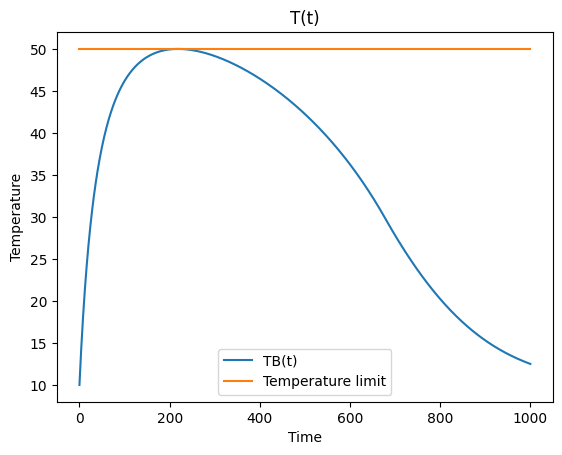

In [8]:
interval = metody2.ekspansja(0.0, 0.001, 1.1, 1000, objective_function)
print('Optimization interval: ', interval)
print('Optimization result (using fibonacci method): ', metody2.fibonacci(interval[0], interval[1], 1e-7, objective_function), 'm^2')
var = objective_function(metody2.fibonacci(interval[0], interval[1], 1e-7, objective_function))
y = var[1][:, 2]
t = np.linspace(0, 1000, 1000)
plt.plot(t, y, label='TB(t)')
plt.plot(t, np.full((len(t), 1), 50), label='Temperature limit')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('T(t)')
plt.legend()